In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
%cd  'Progetto Covid Gruppo Horror'/
%ls

In [9]:
df_province = pd.read_csv("Regioni_clean_venerdì_2.csv",sep=";")
df_comuni = pd.read_csv("comuni_clean.csv",sep=";")

In [11]:
# Creo tre dataframe per analizzare i diversi range di abitanti per la popolazione
df_comuni_meno_10000 = df_comuni[df_comuni['Popolazione2011'] < 10000]
df_comuni_tra_10000_50000 = df_comuni[(df_comuni['Popolazione2011'] >= 10000) & (df_comuni['Popolazione2011'] <= 50000)]
df_comuni_piu_50000 = df_comuni[df_comuni['Popolazione2011'] > 50000]

In [12]:
# Calcolo l'incidenza del COVID-19 per ogni scaglione con comuni meno di 10000 abitanti
df_covid_comuni_meno_10000 = df_province[df_province['RegionName'].isin(df_comuni_meno_10000['Regione'])]
df_incidenza_meno_10000 = df_covid_comuni_meno_10000.groupby('RegionName')['TotalPositiveCases'].sum() / df_comuni_meno_10000.groupby('Regione')['Popolazione2011'].sum() * 100
df_incidenza_meno_10000_sorted = df_incidenza_meno_10000.sort_values(ascending=False)
# Calcolo l'incidenza del COVID-19 per ogni scaglione con comuni tra i 10000 e 50000 abitanti
df_covid_comuni_tra_10000_50000 = df_province[df_province['RegionName'].isin(df_comuni_tra_10000_50000['Regione'])]
df_incidenza_tra_10000_50000 = df_covid_comuni_tra_10000_50000.groupby('RegionName')['TotalPositiveCases'].sum() / df_comuni_tra_10000_50000.groupby('Regione')['Popolazione2011'].sum() * 100
df_incidenza_tra_10000_50000_sorted = df_incidenza_tra_10000_50000.sort_values(ascending=False)
# Calcolo l'incidenza del COVID-19 per ogni scaglione con comuni con più di 50000 abitanti
df_covid_comuni_piu_50000 = df_province[df_province['RegionName'].isin(df_comuni_piu_50000['Regione'])]
df_incidenza_piu_50000 = df_covid_comuni_piu_50000.groupby('RegionName')['TotalPositiveCases'].sum() / df_comuni_piu_50000.groupby('Regione')['Popolazione2011'].sum() * 100
df_incidenza_piu_50000_sorted = df_incidenza_piu_50000.sort_values(ascending=False)

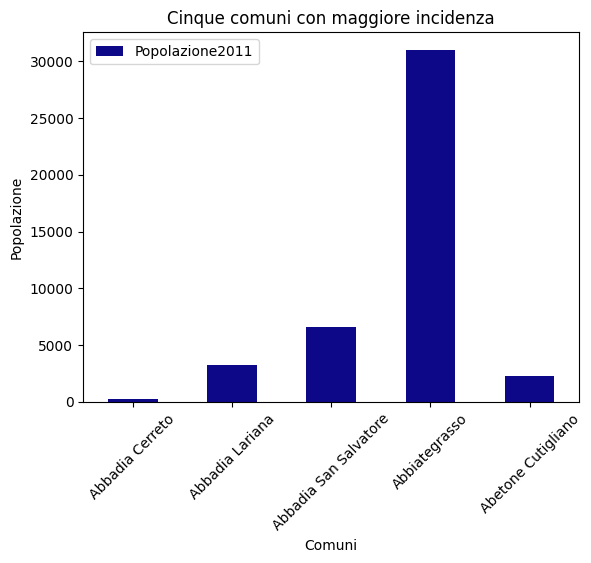

In [13]:
#cerco i comuni nello scaglione con minor numero di abitanti
df_comuni_meno_10000 = df_comuni[df_comuni['Popolazione2011'] < 10000]
df_covid_comuni_meno_10000 = df_province[df_province['RegionName'].isin(df_comuni_meno_10000['Regione'])]
#divido il numero totale di positivi con l'intera popolazione
df_incidenza = df_covid_comuni_meno_10000.groupby('RegionName')['TotalPositiveCases'].sum() / df_comuni_meno_10000.groupby('Regione')['Popolazione2011'].sum() * 100
df_incidenza_sorted = df_incidenza.sort_values(ascending=False)
#prendo i primi 5 comuni con incidenza maggiore (grazie al fatto che vanno dal più grande al più piccolo)
df_top_comuni = df_comuni[df_comuni['Regione'].isin(df_incidenza_sorted.head().index)]
df_top_comuni_top_5 = df_top_comuni.head(5)
#creazione del grafico
df_top_comuni_top_5.plot(x='Denominazione', y='Popolazione2011', kind='bar', colormap='plasma')
plt.xlabel('Comuni')
plt.ylabel('Popolazione')
plt.title('Cinque comuni con maggiore incidenza')
plt.xticks(rotation=45)
plt.show()